In [ ]:
%matplotlib inline


# Linear Regression Example
The example below uses only the first feature of the `diabetes` dataset,
in order to illustrate the data points within the two-dimensional plot.
The straight line can be seen in the plot, showing how linear regression
attempts to draw a straight line that will best minimize the
residual sum of squares between the observed responses in the dataset,
and the responses predicted by the linear approximation.

The coefficients, residual sum of squares and the coefficient of
determination are also calculated.


[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04688253
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452873
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00422151
   0.00306441]]
Type of diabetes_X: <class 'numpy.ndarray'>
Shape of diabetes_X: (442, 10)

Type of diabetes_y: <class 'numpy.ndarray'>
Shape of diabetes_y: (442,)

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


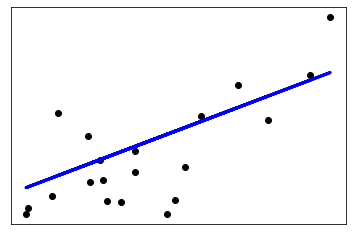

In [30]:
# Code source: Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
print(diabetes_X)
print(f"Type of diabetes_X: {type(diabetes_X)}")
print(f"Shape of diabetes_X: {diabetes_X.shape}\n")

print(f"Type of diabetes_y: {type(diabetes_y)}")
print(f"Shape of diabetes_y: {diabetes_y.shape}\n")

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]


# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

1. Linear regression is an algorithm that takes as input a feature vector 𝐱 and outputs a real number 𝑦. To make a prediction, we compute the affine combination ̂𝑦 = 𝐱.𝐰 + 𝘣.
2. `diabetes_X` and `diabetes_y` are both of type `ndarray`of the `numpy` module with shapes (442, 10) and (442,) respectively.
3. The first axis of `diabetes_X` corresponds to the object vector of each example and the second a component's value for a specific feature. The first (and only) axis of `diabetes_y` corresponds to the y values of each example which the regressor will attempt to predict.
4. Calling the `fit` method with `diabetes_X_train, diabetes_y_train` on the regressor object corresponds to the learning phase of the algorithm whereas the `predict` method evidently makes predictions on the test set `diabetes_X_test` using the trained regressor.
5. The instruction `diabetes_X = diabetes_X[:, np.newaxis, 2]` takes the 3rd value of each array (i.e. vector) in the first axis and creates a new `ndarray` of size (442, 1). We reduce the value of the second axis to only take one feature per vector into account in order be able to graph the y values and predictions on 2-D plot.
6. The evaluation metric used is mean squared error which is the sum of the square of each 𝑦ᵢ - 𝑦̂ᵢ over the total number of examples.